In [43]:
#Importar las librerias
import numpy as np
import pandas as pd

import datetime
import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix

In [44]:
import yfinance as yf

In [45]:
!pip install yfinance

In [46]:
#Vamos a comparar estadisticamente una lñista de tickers.
#Vamos a decsargar tres tickers
fecha_inicial="2021-12-31"
fecha_final="2023-10-05"

In [61]:
# Descargar los datos históricos de precios de cierre para las empresas FEMSA, HERDEZ, CUERVO, AC y ALSEA
femsa = yf.download("FEMSAUBD.MX", fecha_inicial, fecha_final)
herdez = yf.download("HERDEZ.MX", fecha_inicial, fecha_final)
cuervo = yf.download("CUERVO.MX", fecha_inicial, fecha_final)
ac = yf.download("AC.MX", fecha_inicial, fecha_final)
alsea = yf.download("ALSEA.MX", fecha_inicial, fecha_final)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [48]:
import yfinance as yf

# Especifica los símbolos de las empresas que deseas obtener
tickers = ["FEMSAUBD.MX", "CUERVO.MX", "HERDEZ.MX", "ALSEA.MX", "AC.MX",]

# Descarga los datos históricos de cierre para las empresas
datos = yf.download(tickers, fecha_inicial, fecha_final)["Close"]
datos



[*********************100%%**********************]  5 of 5 completed


,AC.MX,ALSEA.MX,CUERVO.MX,FEMSAUBD.MX,HERDEZ.MX
Date,,,,,
2021-12-31,130.520004,37.950001,51.360001,159.320007,40.480000
2022-01-03,128.520004,39.939999,51.270000,159.110001,39.990002
2022-01-04,130.869995,41.029999,51.139999,161.389999,39.869999
2022-01-05,129.750000,41.900002,50.810001,162.210007,39.700001
2022-01-06,128.740005,41.779999,50.560001,161.800003,39.990002
...,...,...,...,...,...
2023-09-28,158.050003,63.419998,42.560001,189.089996,41.830002
2023-09-29,158.770004,63.599998,41.619999,189.979996,40.619999
2023-10-02,160.149994,62.990002,41.590000,195.759995,40.610001


In [49]:
#Para sacar la varianza de los datos
varianza=datos.var()
varianza

AC.MX          313.085508
ALSEA.MX        63.696433
CUERVO.MX       12.045557
FEMSAUBD.MX    432.981202
HERDEZ.MX       48.487926
dtype: float64

In [50]:
# Calcula los rendimientos diarios para cada empresa utilizando pct_change()
rendimientos=datos.pct_change()

rendimientos

,AC.MX,ALSEA.MX,CUERVO.MX,FEMSAUBD.MX,HERDEZ.MX
Date,,,,,
2021-12-31,NaN,NaN,NaN,NaN,NaN
2022-01-03,-0.015323,0.052437,-0.001752,-0.001318,-0.012105
2022-01-04,0.018285,0.027291,-0.002536,0.014330,-0.003001
2022-01-05,-0.008558,0.021204,-0.006453,0.005081,-0.004264
2022-01-06,-0.007784,-0.002864,-0.004920,-0.002528,0.007305
...,...,...,...,...,...
2023-09-28,0.004832,0.001263,-0.016181,-0.001531,0.005529
2023-09-29,0.004556,0.002838,-0.022087,0.004707,-0.028927
2023-10-02,0.008692,-0.009591,-0.000721,0.030424,-0.000246


In [51]:
#Analisis estadsiticos de los rendimientos
rendimientos.describe()

,AC.MX,ALSEA.MX,CUERVO.MX,FEMSAUBD.MX,HERDEZ.MX
count,444.000000,444.000000,444.000000,444.000000,444.000000
mean,0.000537,0.001361,-0.000376,0.000562,0.000182
std,0.014519,0.018767,0.015703,0.014385,0.022112
min,-0.048598,-0.071988,-0.056592,-0.070087,-0.063233
25%,-0.008347,-0.010033,-0.010216,-0.008396,-0.012550
50%,0.000502,0.001660,-0.000275,0.000434,-0.000502
75%,0.008380,0.011904,0.008956,0.008580,0.013467
max,0.070801,0.088256,0.055485,0.088805,0.084856


In [52]:
#Para sacar la matriz de covarianza
datos.cov()

,AC.MX,ALSEA.MX,CUERVO.MX,FEMSAUBD.MX,HERDEZ.MX
AC.MX,313.085508,63.637468,-28.334256,210.337978,106.627247
ALSEA.MX,63.637468,63.696433,1.902371,144.833015,25.854515
CUERVO.MX,-28.334256,1.902371,12.045557,11.746211,-5.794332
FEMSAUBD.MX,210.337978,144.833015,11.746211,432.981202,99.168792
HERDEZ.MX,106.627247,25.854515,-5.794332,99.168792,48.487926


In [53]:
#Para sacar la varianza de los rendimientos
var=rendimientos.var()*100
var

AC.MX          0.021079
ALSEA.MX       0.035221
CUERVO.MX      0.024660
FEMSAUBD.MX    0.020692
HERDEZ.MX      0.048892
dtype: float64

In [62]:
# Calcular los rendimientos diarios para la empresa HERDEZ
herdez["Rendimientos"] = (herdez["Close"] / herdez["Close"].shift(1)) - 1

# Eliminar filas con valores NaN resultantes de la primera fila
herdez = herdez[["Close", "Rendimientos"]].dropna()

<Axes: >

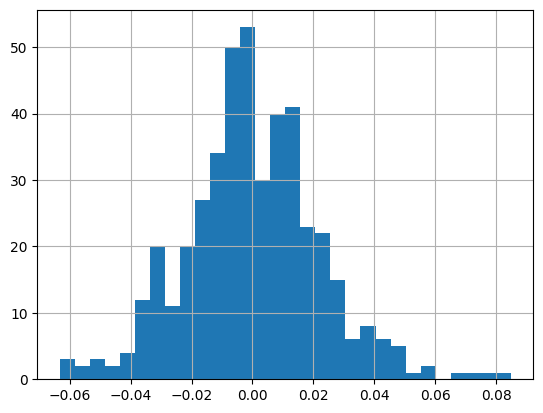

In [60]:
herdez["Rendimientos"].hist(bins=30)